# Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [3]:
# Converting the data to a dataframe to better understand it

df = pd.DataFrame(cancer.data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.shape

(569, 30)

## Applying PCA without standardizing

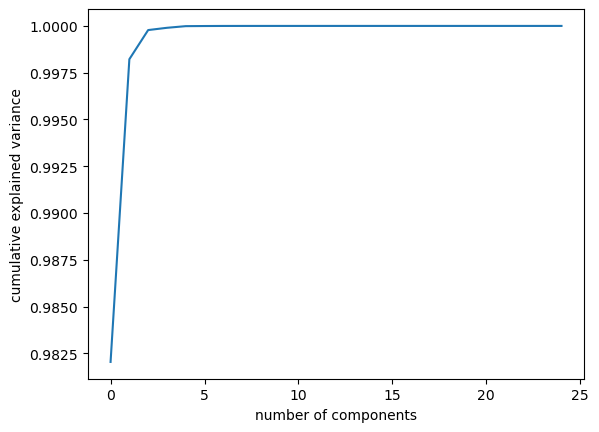

In [6]:
# Applying PCA on the scaled dataset and checking the variance vs components plot

pca = PCA().fit(cancer.data)


plt.plot(np.cumsum(pca.explained_variance_ratio_)[:25])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
# Choosing 2 dimensions to better visualize the data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(cancer.data)

In [8]:
# Checking the amount of variance explained by the top 2 components

pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [9]:
# Checking the total variance explained by the top 2 components

np.cumsum(pca.explained_variance_ratio_)[-1]*100

99.82211613741721

In [10]:
# Checking the shape before and after transformation

print(f"Original Shape: {cancer.data.shape}")
print(f"Transformed Shape: {X_pca.shape}")

Original Shape: (569, 30)
Transformed Shape: (569, 2)


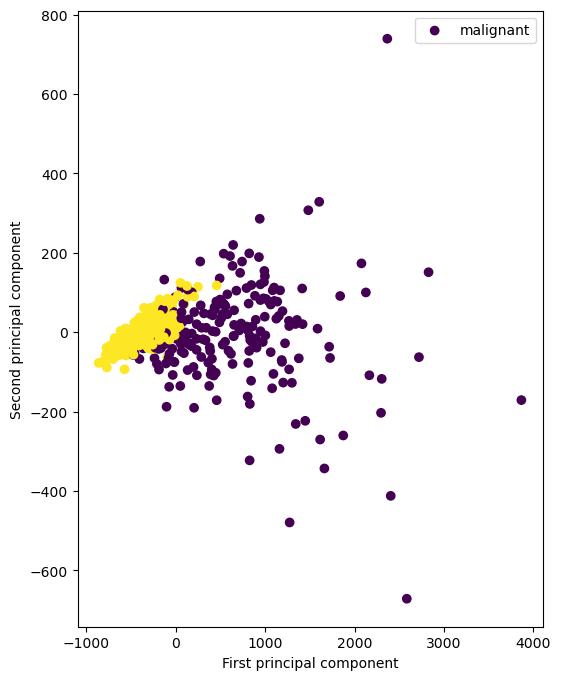

In [11]:
# Plotting the data 

plt.figure(figsize=(6,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = cancer.target)
plt.legend(labels=cancer.target_names)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

## Applying PCA after standardizing 

In [12]:
# Standardizing the data before we apply PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

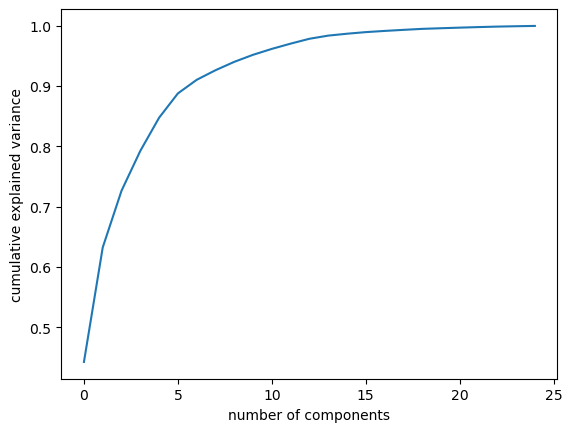

In [13]:
# Applying PCA on the scaled dataset and checking the variance vs components plot

pca = PCA().fit(X_scaled)


plt.plot(np.cumsum(pca.explained_variance_ratio_)[:25])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [14]:
# Choosing 2 dimensions to better visualize the data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Checking the amount of variance explained by the top 2 components

pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [16]:
# Checking the total variance explained by the top 2 components

np.cumsum(pca.explained_variance_ratio_)[-1]*100

63.24320765155937

In [17]:
# Checking the shape before and after transformation

print(f"Original Shape: {cancer.data.shape}")
print(f"Transformed Shape: {X_pca.shape}")

Original Shape: (569, 30)
Transformed Shape: (569, 2)


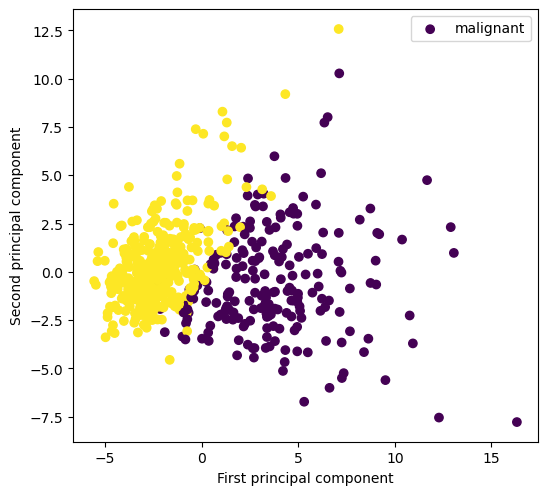

In [18]:
# Plotting the data 

plt.figure(figsize=(6,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = cancer.target)
plt.legend(labels=cancer.target_names)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()